# Hierarchical Clustering

Hierarchical clustering methods predict subgroups within data by finding the distance between each data point ant its nearest neighbours, and then linking the most nearby neighbours.

The algorithm uses the distance metric it calculates to predict subgroups.

To guess the number of subgroups in a dataset, first look at a dendrogram visualization of the clustering results.

*Dendrogram* a tree graph that's useful for visually displaying taxonomies, lineages, and relatedness

Use cases:

- Hospital resource management
- Business process management
- Customer segmentation
- Social network analysis

Parameters:

| Distance Metrics | Linkage Parameters |
| - | - |
| Euclidian | Ward |
| Manhattan | Complete |
| Cosine | Average |

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb 

import sklearn
import sklearn.metrics as sm 

In [4]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

In [6]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [22]:
cars = pd.read_csv('../../inputs/mtcars.csv')

x = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars.iloc[:,(9)].values

### Using scipy to generate dendrogram

In [17]:
z = linkage(x, 'ward')

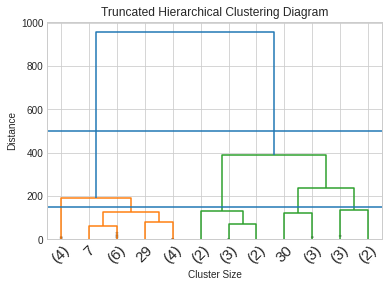

In [19]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

# You can see from our dendrogram, if we're using a two-cluster model, that's really saying that we have a distance between data points and its nearest neighbors, and that distance should be set at a maximum of 400.
# This is because that's where there are are actually two clusters in the model.
# Based on what I know about the data, two seems like a reasonable number of clusters.

## Generating hierarchical Clusters

In [23]:
k = 2 # number of clusters
HClustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
HClustering.fit(x)

sm.accuracy_score(y, HClustering.labels_)


0.78125

In [24]:
k = 2 # number of clusters
HClustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
HClustering.fit(x)

sm.accuracy_score(y, HClustering.labels_)

0.78125

In [26]:
k = 2 # number of clusters
HClustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
HClustering.fit(x)

sm.accuracy_score(y, HClustering.labels_)

0.71875